In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats
import ast

In [2]:
def discriminability(H):
    return 1 - 1/2**H

def ent(D):
    if D == 1: return 0
    return np.log2(1/(1-D))

In [3]:
LANGS = ['ar', 'ca', 'de', 'en', 'es', 'fr', 'he', 'it', 'nl', 'pl', 'sl', 'sv']
labels = ['arabic', 'catalan', 'german', 'english', 'spanish', 'french', 'hebrew', 'italian', 'dutch', 'polish', 'slovenian', 'swedish']
num_values = [6, 4, 4, 2, 4, 4, 6, 4, 3, 6, 9, 4]

In [4]:
# Load data for all languages
langs = {}
for lang in LANGS:
    summary_df = pd.read_csv(f'./{lang}_dist_summary.csv')
    if lang != 'nl':
        summary_df = summary_df.rename(columns={'Unnamed: 0': 'category'})
    if lang == 'nl':
        summary_df = summary_df.drop(columns=['Unnamed: 0'])
    langs[lang] = summary_df

In [5]:
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec


/tmp/ipykernel_1228566/1580717234.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(gs[0])  # Main plot
/tmp/ipykernel_1228566/1580717234.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  token_entropies = np.array([float(langs[lang][langs[lang]['category']=='token']['Entropy']) for lang in LANGS])
/tmp/ipykernel_1228566/1580717234.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  anim_token_entropies = np.array([float(langs[lang][langs[lang]['category']=='anim_token']['Entropy']) for lang in LANGS])
/tmp/ipykernel_1228566/1580717234.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might 

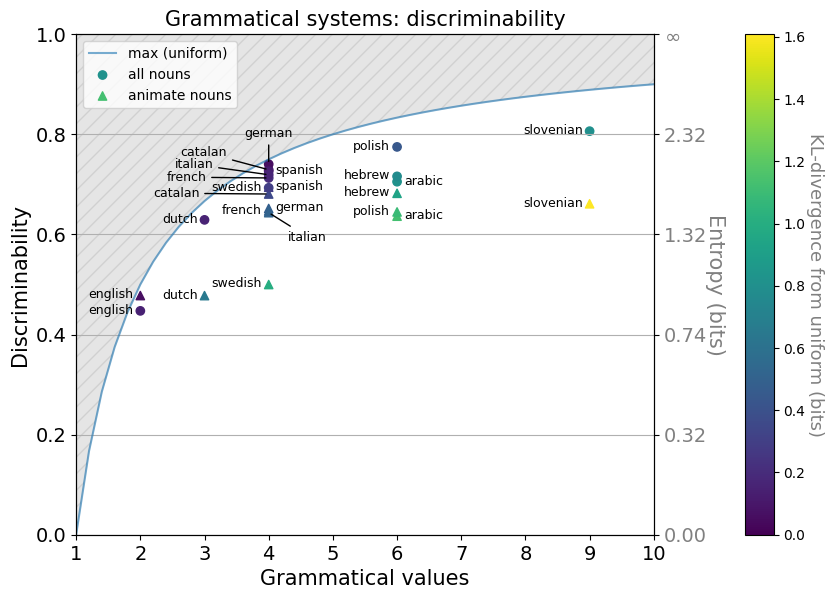

In [18]:
# Define the x values
x = np.arange(1, 11)  # Start from 1 to avoid log2(0)

# Compute entropy (log2(x)) and discriminability
max_ent = np.log2(np.arange(1, 11, 0.2))
max_discrim = discriminability(max_ent)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(9, 6.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[10, 0.5], wspace=0.3)  # Adjust wspace to increase space

ax1 = plt.subplot(gs[0])  # Main plot
cax = plt.subplot(gs[1])  # Colorbar axis

# Plot the log2(x) curve
ax1.plot(np.arange(1, 11, 0.2), max_discrim, label='max (uniform)', alpha=0.6)

# Plot points
token_entropies = np.array([float(langs[lang][langs[lang]['category']=='token']['Entropy']) for lang in LANGS])
token_cs = np.log2(num_values) - token_entropies

anim_token_entropies = np.array([float(langs[lang][langs[lang]['category']=='anim_token']['Entropy']) for lang in LANGS])
anim_token_cs = np.log2(num_values) - anim_token_entropies

vmin=0
vmax=max(max(token_cs), max(anim_token_cs))

cb = ax1.scatter(num_values, discriminability(token_entropies), marker='o', c=token_cs, label='all nouns', vmin=vmin, vmax=vmax)
scatter=ax1.scatter(num_values, discriminability(anim_token_entropies), marker='^', c=anim_token_cs, label='animate nouns', norm=cb.norm)

# Label each point
for i, lang in enumerate(LANGS):
    if lang in ('en', 'nl', 'sl'):
        ax1.annotate(f'{labels[i]}', (num_values[i], discriminability(token_entropies[i])), textcoords="offset points", 
                 xytext=(-5, -2), ha='right', fontsize=9, 
                )
        ax1.annotate(f'{labels[i]}', (num_values[i], discriminability(anim_token_entropies[i])), textcoords="offset points", 
                 xytext=(-5, -2), ha='right', fontsize=9,)
    elif lang in ('ar', 'es'):
        ax1.annotate(f'{labels[i]}', (num_values[i], discriminability(token_entropies[i])), textcoords="offset points", 
                 xytext=(5, -2), ha='left', fontsize=9,
                )
        ax1.annotate(f'{labels[i]}', (num_values[i], discriminability(anim_token_entropies[i])), textcoords="offset points", 
                 xytext=(5, -2), ha='left', fontsize=9, )
    elif lang == 'de':
        ax1.annotate(f'{labels[i]}', (num_values[i], discriminability(token_entropies[i])), textcoords="offset points", 
                 xytext=(0, 20), ha='center', fontsize=9, arrowprops=dict(arrowstyle='-', color='black', lw=1)
                )
        ax1.annotate(f'{labels[i]}', (num_values[i], discriminability(anim_token_entropies[i])), textcoords="offset points", 
                 xytext=(5, -2), ha='left', fontsize=9, )
    elif lang == 'ca':
        ax1.annotate(f'{labels[i]}', (num_values[i], discriminability(token_entropies[i])), textcoords="offset points", 
                 xytext=(-30, 10), ha='right', fontsize=9, arrowprops=dict(arrowstyle='-', color='black', lw=1)
                )
        ax1.annotate(f'{labels[i]}', (num_values[i], discriminability(anim_token_entropies[i])), textcoords="offset points", 
                 xytext=(-50, -2), ha='right', fontsize=9, arrowprops=dict(arrowstyle='-', color='black', lw=1))
    elif lang == 'it':
        ax1.annotate(f'{labels[i]}', (num_values[i], discriminability(token_entropies[i])), textcoords="offset points", 
                 xytext=(-40, 5), ha='right', fontsize=9, arrowprops=dict(arrowstyle='-', color='black', lw=1)
                )
        ax1.annotate(f'{labels[i]}', (num_values[i], discriminability(anim_token_entropies[i])), textcoords="offset points", 
                 xytext=(14, -20), ha='left', fontsize=9, arrowprops=dict(arrowstyle='-', color='black', lw=1))
    elif lang == 'fr':
        ax1.annotate(f'{labels[i]}', (num_values[i], discriminability(token_entropies[i])), textcoords="offset points", 
                 xytext=(-45, -2), ha='right', fontsize=9, arrowprops=dict(arrowstyle='-', color='black', lw=1)
                )
        ax1.annotate(f'{labels[i]}', (num_values[i], discriminability(anim_token_entropies[i])), textcoords="offset points", 
                 xytext=(-5, -2), ha='right', fontsize=9)
    else:
        ax1.annotate(f'{labels[i]}', (num_values[i], discriminability(token_entropies[i])), textcoords="offset points", 
                     xytext=(-5, -2), ha='right', fontsize=9, 
                    )
        ax1.annotate(f'{labels[i]}', (num_values[i], discriminability(anim_token_entropies[i])), textcoords="offset points", 
                     xytext=(-5, -2), ha='right', fontsize=9,)


# Set labels and title for the left y-axis and x-axis
ax1.set_xlabel('Grammatical values', fontsize=15)
ax1.set_ylabel('Discriminability', fontsize=15)
ax1.set_ylim([0, 1.0])
ax1.tick_params(axis='y')

ax1.set_xticks(np.arange(1, 11))

# Create a second y-axis for discriminability
ax2 = ax1.twinx()
ax2.set_ylabel('Entropy (bits)', color='gray', rotation=270, labelpad=13, fontsize=15)
ax2.tick_params(axis='y', labelcolor='gray')
ax2.set_yticks(np.arange(0, 1.1, 0.2))
e = [f'{ent(d):.2f}' for d in np.arange(0, 1.1, 0.2)]
e[-1] = r'$\infty$'
ax2.set_yticklabels(e)
ax2.set_ylim([0, 1.0])

# Add legends
ax1.legend(loc='upper left')
ax1.set_xlim([1, 10])

# Add diagonal shading above the curve
ax1.fill_between(np.arange(1, 11, 0.2), max_discrim, y2=max(max_discrim) + 1, 
                 interpolate=True, color='gray', alpha=0.2, hatch='//')

ax1.tick_params(axis='both', which='major', labelsize=14)  # Increase size of major tick labels
ax2.tick_params(axis='y', which='major', labelsize=14)

# Add a color bar to the plot with specified limits
cbar = plt.colorbar(scatter, cax=cax)
cbar.set_label('KL-divergence from uniform (bits)', rotation=270, labelpad=13, fontsize=13, color='gray')

# Show the plot
plt.title('Grammatical systems: discriminability', fontsize=15)
ax1.grid(zorder=0)
ax1.xaxis.grid(False)

fig.tight_layout()
plt.show()